In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

## Load Data

In [54]:
data= pd.read_csv('data/EcomerceData.csv', encoding="ISO-8859-1")

In [55]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [56]:
df= data.copy()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [58]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<Axes: ylabel='UnitPrice'>

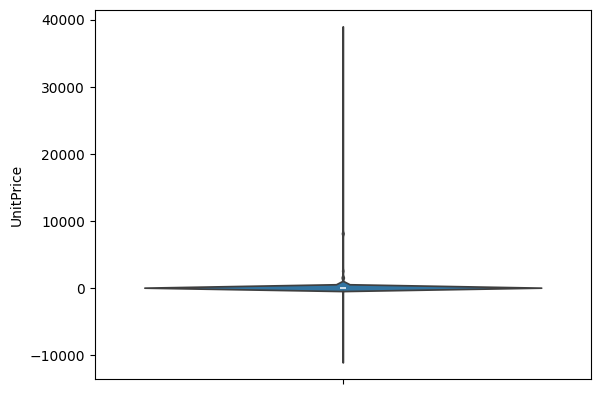

In [59]:
sns.violinplot(df.UnitPrice)

In [60]:
df= df[df['UnitPrice']>0]
df.UnitPrice.describe()

count    539392.000000
mean          4.673648
std          94.614722
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [61]:
df= df[df['Quantity']>0]
df.Quantity.describe()

count    530104.000000
mean         10.542037
std         155.524124
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [62]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [63]:
df.dropna(subset='CustomerID', how='all', inplace=True)

In [64]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [65]:
df['InvoiceDate'].max()

'9/30/2011 9:45'

In [66]:
import datetime as dt
now= dt.date(2011,12,30)

In [67]:
df['date']= pd.DatetimeIndex(df.InvoiceDate).date

In [68]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,2010-12-01


In [69]:
#group by customer by last date they purchased...

recency_df= df.groupby(['CustomerID'], as_index=False)['date'].max()
recency_df.columns= ['CustomerID', 'LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [70]:
#calculate how often he is purchasing with reference to latest date in days..

recency_df['Recency']= recency_df.LastPurchaseDate.apply(lambda x: (now - x).days)

In [71]:
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,346
1,12347.0,2011-12-07,23
2,12348.0,2011-09-25,96
3,12349.0,2011-11-21,39
4,12350.0,2011-02-02,331


In [72]:
recency_df.drop(columns=['LastPurchaseDate'], inplace=True)

In [73]:
#check frequency of customer means how many transaction has been done..

frequency_df= df.copy()
frequency_df.drop_duplicates(subset=['CustomerID', 'InvoiceNo'], keep='first', inplace=True)
frequency_df = frequency_df.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
frequency_df.columns= ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [74]:
#calculate how much a customer spend in the each transaction...

df['Total_Cost']= df['Quantity'] * df['UnitPrice']

In [75]:
#check summed up spend of a customer with respect to latest date..

monetary_df= df.groupby('CustomerID', as_index=False)['Total_Cost'].sum()
monetary_df.columns= ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [76]:
#Combine all together all dataframe in so we have recency, frequency and monetary values together

rf= recency_df.merge(frequency_df, left_on='CustomerID', right_on='CustomerID')

rfm= rf.merge(monetary_df, left_on='CustomerID', right_on='CustomerID')

rfm.set_index('CustomerID', inplace=True)

In [77]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,346,1,77183.60
12347.0,23,7,4310.00
12348.0,96,4,1797.24
12349.0,39,1,1757.55
12350.0,331,1,334.40


In [78]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

def RScore(x,p,d):
    if x <=d[p][0.25]:
        return 1
    elif x <=d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x, p, d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1
    

In [79]:
'''
quantile is like 25% , 50% and 75% level of values. example if we have 100 values first 25 in 1st quartile 25% 
then second contain next 25% which is 50% and there after next 25% which is 75% and 4th quartile is more than 75% 
values.
'''

qunatiles= rfm.quantile(q=[0.25,0.50,0.75])
qunatiles

,Recency,Frequency,Monetary
0.25,38.00,1.0,307.415
0.50,71.00,2.0,674.485
0.75,162.75,5.0,1661.740


In [80]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,346,1,77183.60
12347.0,23,7,4310.00
12348.0,96,4,1797.24
12349.0,39,1,1757.55
12350.0,331,1,334.40


In [81]:
rfm= rfm.reset_index()

In [82]:
rfm.to_csv('data/rfm_data.csv', index=False)

In [83]:
rfm_segmentation= rfm.copy()

In [84]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency', qunatiles))

rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency', qunatiles))

rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary', qunatiles))

In [85]:
qunatiles.to_dict()

{'Recency': {0.25: 38.0, 0.5: 71.0, 0.75: 162.75},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.485,
  0.75: 1661.7400000000002}}

In [86]:
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,12346.0,346,1,77183.60,4,4,1
1,12347.0,23,7,4310.00,1,1,1
2,12348.0,96,4,1797.24,3,2,1
3,12349.0,39,1,1757.55,2,4,1
4,12350.0,331,1,334.40,4,4,3


In [87]:
##combine the scores to create one score (eg. 4+1+1). This will create a score between 3 and 12.

rfm_segmentation['RFM_Score']= rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] + rfm_segmentation['M_Quartile']

In [88]:
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
0,12346.0,346,1,77183.60,4,4,1,9
1,12347.0,23,7,4310.00,1,1,1,3
2,12348.0,96,4,1797.24,3,2,1,6
3,12349.0,39,1,1757.55,2,4,1,7
4,12350.0,331,1,334.40,4,4,3,11


In [89]:
def segment(x):
    if x<=5:
        return 0 # Potential Loyal Customer
    elif x<=10 & x>=6:
        return 1 # Hibranating Customer
    else:
        return 2 # At-Risk Customer

In [90]:
rfm_segmentation['Segmnet']= rfm_segmentation['RFM_Score'].apply(segment)

In [91]:
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score,Segmnet
0,12346.0,346,1,77183.60,4,4,1,9,2
1,12347.0,23,7,4310.00,1,1,1,3,0
2,12348.0,96,4,1797.24,3,2,1,6,2
3,12349.0,39,1,1757.55,2,4,1,7,2
4,12350.0,331,1,334.40,4,4,3,11,2


<Axes: xlabel='Segmnet', ylabel='count'>

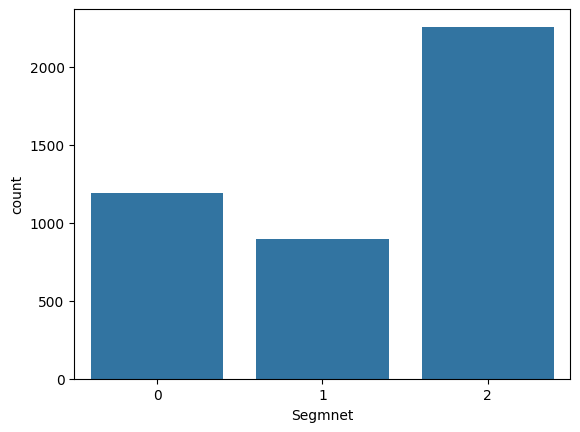

In [92]:
sns.countplot(x='Segmnet', data=rfm_segmentation)

### Feature matrix (RFM values) and target (customer segment)


In [93]:
rfm_segmentation.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Quartile',
       'F_Quartile', 'M_Quartile', 'RFM_Score', 'Segmnet'],
      dtype='object')

In [94]:
X= rfm_segmentation[['Recency','Frequency','Monetary']]
y= rfm_segmentation['Segmnet']

### Split the data into training and testing sets


In [95]:
X_train, X_test,y_train,y_test= train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

### Standardize the data (SVM and Logistic Regression often require this)

In [96]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

## SVM

In [162]:
svm_model= SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [163]:
svm_predict= svm_model.predict(X_test_scaled)

In [164]:
print("SVM Classification Report:\n", classification_report(y_test, svm_predict))
print("SVM Accuracy:", accuracy_score(y_test, svm_predict))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       238
           1       0.00      0.00      0.00       179
           2       0.69      0.96      0.80       451

    accuracy                           0.75       868
   macro avg       0.53      0.63      0.57       868
weighted avg       0.61      0.75      0.67       868

SVM Accuracy: 0.75


d:\Customer Segmentation API\rfm_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Customer Segmentation API\rfm_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Customer Segmentation API\rfm_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Classifier

In [97]:
rf_model= RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [98]:
rf_prediction= rf_model.predict(X_test_scaled)

In [101]:
rf_prediction

array([0, 1, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0,
       1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2,
       1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0,
       2, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2,

In [102]:
def replace_numeric_labels(array):
    labels = {
        0: "Potential",
        1: "Hibernating",
        2: "At-Risk"
    }
    return np.vectorize(labels.get)(array)

In [104]:
labeled_predictions = replace_numeric_labels(rf_prediction)

print(labeled_predictions)

['Potential' 'Hibernating' 'At-Risk' 'At-Risk' 'At-Risk' 'Potential'
 'At-Risk' 'Hibernating' 'At-Risk' 'At-Risk' 'Potential' 'At-Risk'
 'At-Risk' 'At-Risk' 'Potential' 'Hibernating' 'Potential' 'At-Risk'
 'Hibernating' 'At-Risk' 'Potential' 'At-Risk' 'Potential' 'At-Risk'
 'Potential' 'Potential' 'At-Risk' 'Potential' 'Potential' 'Potential'
 'At-Risk' 'Hibernating' 'Potential' 'At-Risk' 'Potential' 'At-Risk'
 'Hibernating' 'Potential' 'Potential' 'At-Risk' 'Potential' 'At-Risk'
 'At-Risk' 'Potential' 'Hibernating' 'Potential' 'Potential' 'At-Risk'
 'At-Risk' 'At-Risk' 'Potential' 'At-Risk' 'Potential' 'At-Risk' 'At-Risk'
 'At-Risk' 'At-Risk' 'At-Risk' 'Hibernating' 'Hibernating' 'At-Risk'
 'At-Risk' 'At-Risk' 'Potential' 'Potential' 'At-Risk' 'At-Risk'
 'Potential' 'Hibernating' 'Hibernating' 'Hibernating' 'Hibernating'
 'Hibernating' 'Hibernating' 'At-Risk' 'At-Risk' 'At-Risk' 'At-Risk'
 'At-Risk' 'At-Risk' 'Hibernating' 'At-Risk' 'Hibernating' 'At-Risk'
 'At-Risk' 'At-Risk' 'Potent

In [51]:
print("Random Forest Classification Report:\n", classification_report(y_test, rf_prediction))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_prediction))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       238
           1       0.97      0.94      0.96       179
           2       0.98      0.98      0.98       451

    accuracy                           0.98       868
   macro avg       0.98      0.98      0.98       868
weighted avg       0.98      0.98      0.98       868

Random Forest Accuracy: 0.9804147465437788


In [52]:
import pickle
import os
with open('model/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

## Logistic Regression

In [168]:
lr_model= LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [169]:
lr_prediction= lr_model.predict(X_test_scaled)

In [170]:
print("Random Forest Classification Report:\n", classification_report(y_test, lr_prediction))
print("Random Forest Accuracy:", accuracy_score(y_test, lr_prediction))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       238
           1       0.00      0.00      0.00       179
           2       0.68      0.94      0.79       451

    accuracy                           0.75       868
   macro avg       0.53      0.62      0.57       868
weighted avg       0.60      0.75      0.66       868

Random Forest Accuracy: 0.7453917050691244


d:\Customer Segmentation API\rfm_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Customer Segmentation API\rfm_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Customer Segmentation API\rfm_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
# Save the Random Forest model
import pickle
import os
model= 'D:\Customer Segmentation API\model'
rf_model_path = os.path.join(model, "rf_model.pkl")
with open(rf_model_path, 'wb') as file:
    pickle.dump(rf_model, file)